<a href="https://colab.research.google.com/github/Eistam/CIND820-Project/blob/main/CIND820.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd 
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
import warnings
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
from google.colab import files
uploaded = files.upload()

Saving bank_full_CIND820.csv to bank_full_CIND820.csv


In [4]:
import io
   
df = pd.read_csv(io.BytesIO(uploaded['bank_full_CIND820.csv']))

In [5]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Dataset has no missing values

In [8]:
#checking for categotical columns
for col in df.columns:
    print()
    if df[col].dtype == 'object':
        print(f'Name of Column is: {col} and unique values are: {df[col].unique()}')



Name of Column is: job and unique values are: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Name of Column is: marital and unique values are: ['married' 'single' 'divorced']

Name of Column is: education and unique values are: ['tertiary' 'secondary' 'unknown' 'primary']

Name of Column is: default and unique values are: ['no' 'yes']


Name of Column is: housing and unique values are: ['yes' 'no']

Name of Column is: loan and unique values are: ['no' 'yes']

Name of Column is: contact and unique values are: ['unknown' 'cellular' 'telephone']


Name of Column is: month and unique values are: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']





Name of Column is: poutcome and unique values are: ['unknown' 'failure' 'other' 'success']

Name of Column is: y and unique values are: ['no' 'yes']


In [9]:
#this function returns categorical variables
def return_categorical(df):

  categorical_columns = [column_name for column_name in df if df[column_name].dtype == 'O']
  return categorical_columns

In [10]:
def return_numerical(df):
  return list(set(df.columns) - set(return_categorical(df)))

def check_normal(df):
  fig, axes = plt.subplots(1,len(return_numerical(df)), figsize =(70, 10))

  for i,numeric_column_name in enumerate(list(set(df.columns) -set(return_categorical(df)))):

    sns.distplot(df[numeric_column_name], ax=axes[i]);
    plt.title(f'Distribution of {numeric_column_name}');
    
def classifier(clf, x_train,x_test,y_train,y_test):
    y_test_pred = clf.predict(x_test)
    y_train_pred = clf.predict(x_train)

    accuracy_test = accuracy_score(y_test,y_test_pred)
    accuracy_train =  accuracy_score(y_train,y_train_pred)
    
    roc_test = roc_auc_score(y_test, y_test_pred, multi_class='ovr')
    roc_train = roc_auc_score(y_train, y_train_pred, multi_class='ovr')
    
    print('Train accuracy is:',accuracy_train )
    print('Test accuracy is:',accuracy_test )
    print()
    print('Train ROC is:', roc_train)
    print('Test ROC is:',roc_test )
    
    # Fscore, precision and recall on test data
    f1 = f1_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred) 
    print()
    print("F score is:",f1 )
    print("Precision is:",precision)
    print("Recall is:", recall)
  

def random_search(clf,params, x_train,x_test,y_train,y_test):
    
    random_search = RandomizedSearchCV(estimator= clf, param_distributions=params, scoring='roc_auc', cv=5)
    random_search.fit(x_train, y_train)
    optimal_model = random_search.best_estimator_

    print("Best parameters are: ", random_search.best_params_)
    print()
    print("Best estimator is: ", random_search.best_estimator_)
    print()
    print('Scores and accuracies are:')
    print()
    classifier(optimal_model, x_train,x_test,y_train,y_test)

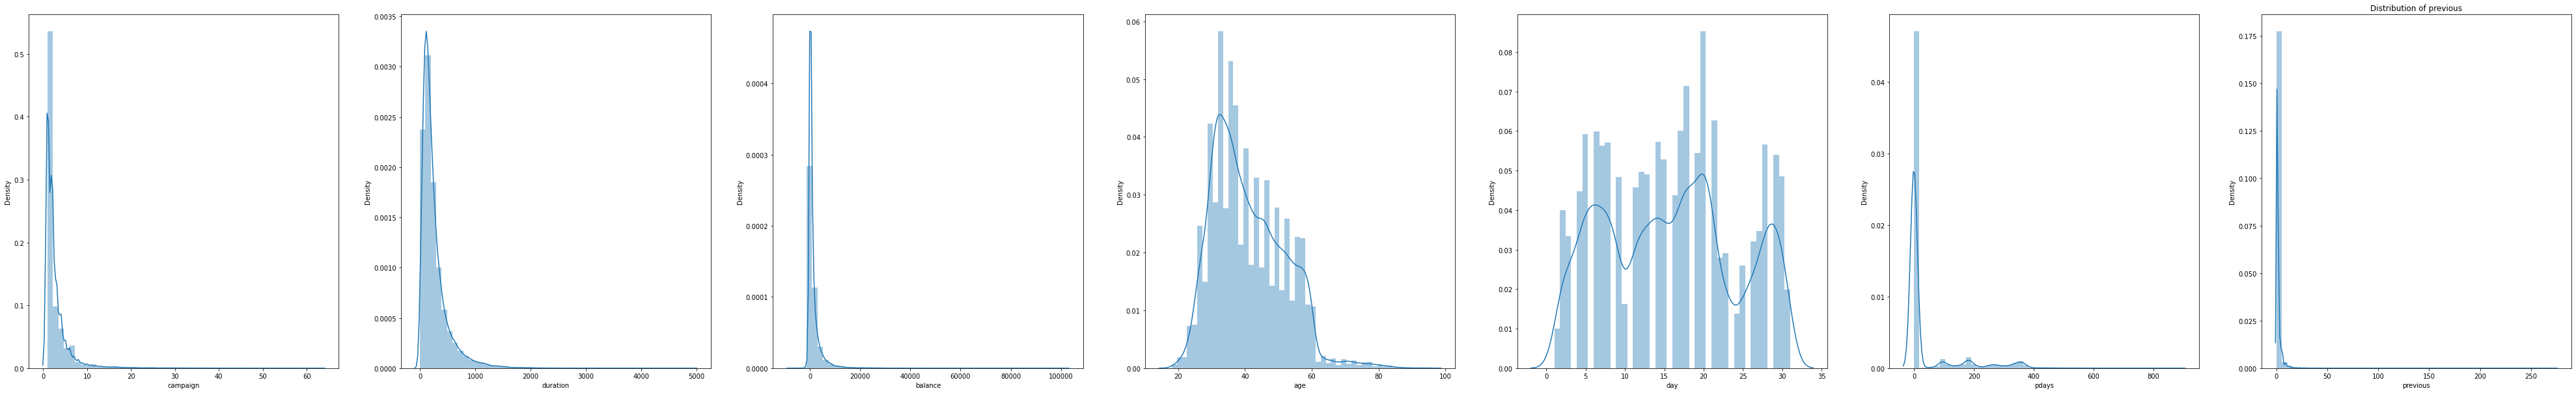

In [11]:
#Checking Distribution For Continuous Variables
check_normal(df)


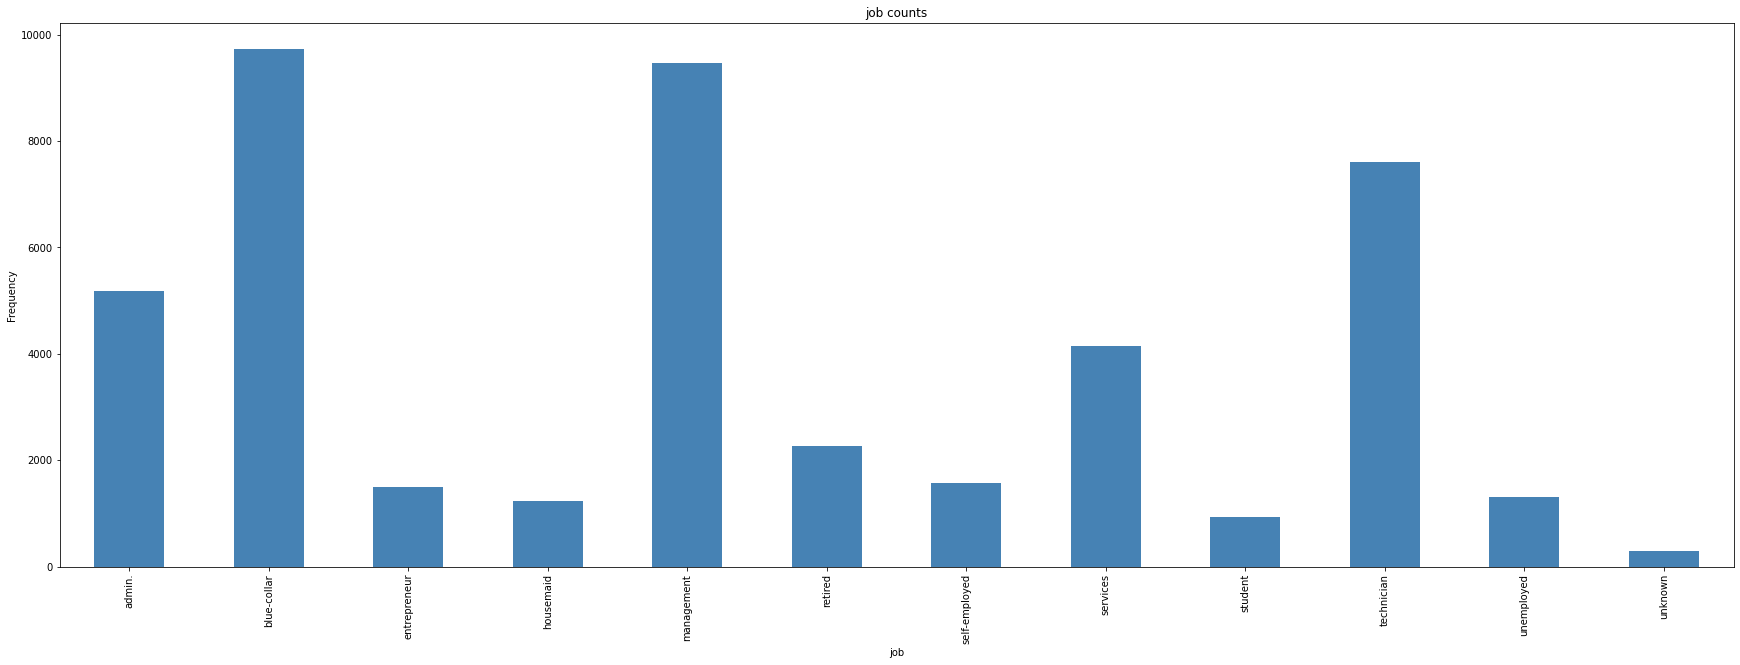

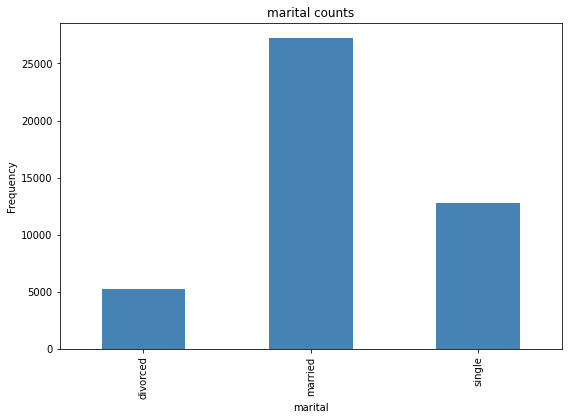

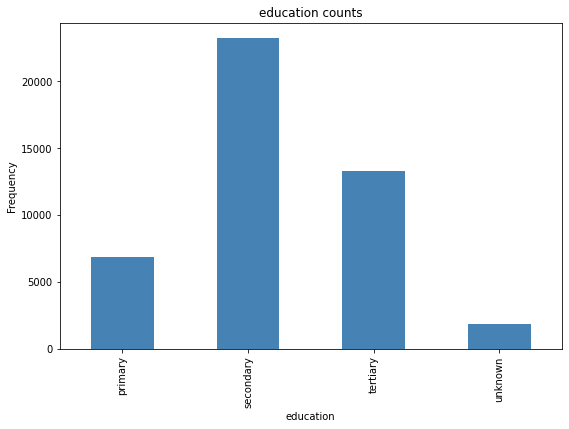

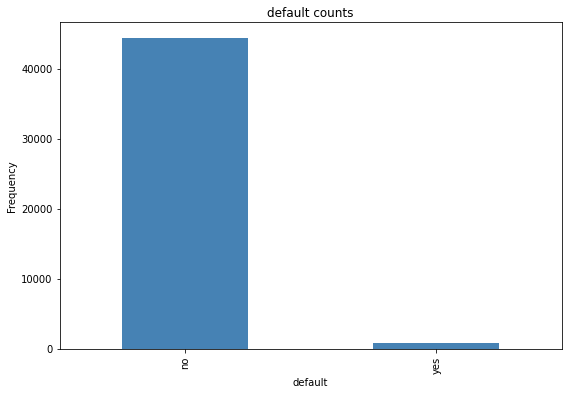

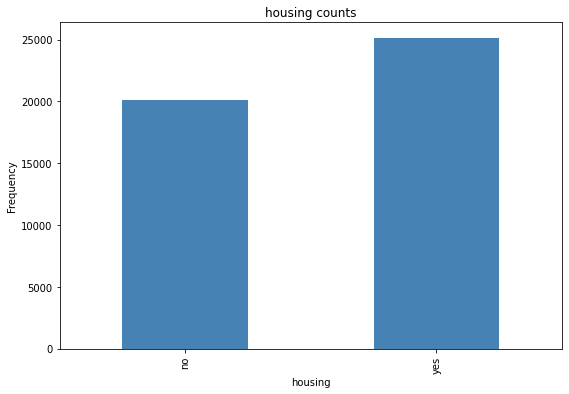

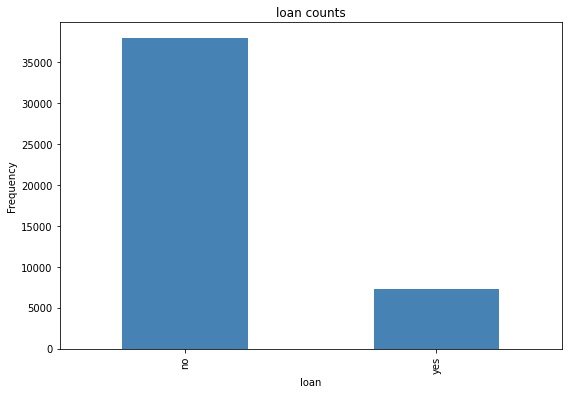

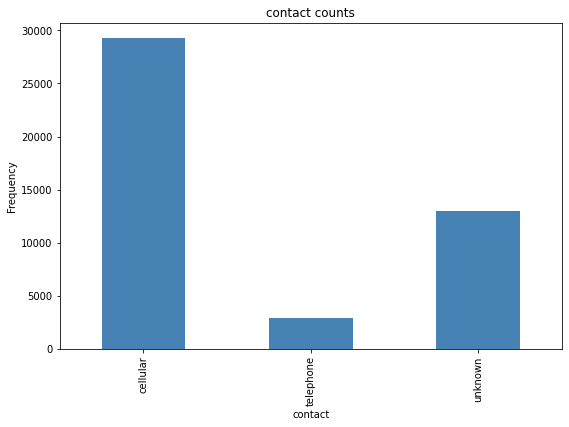

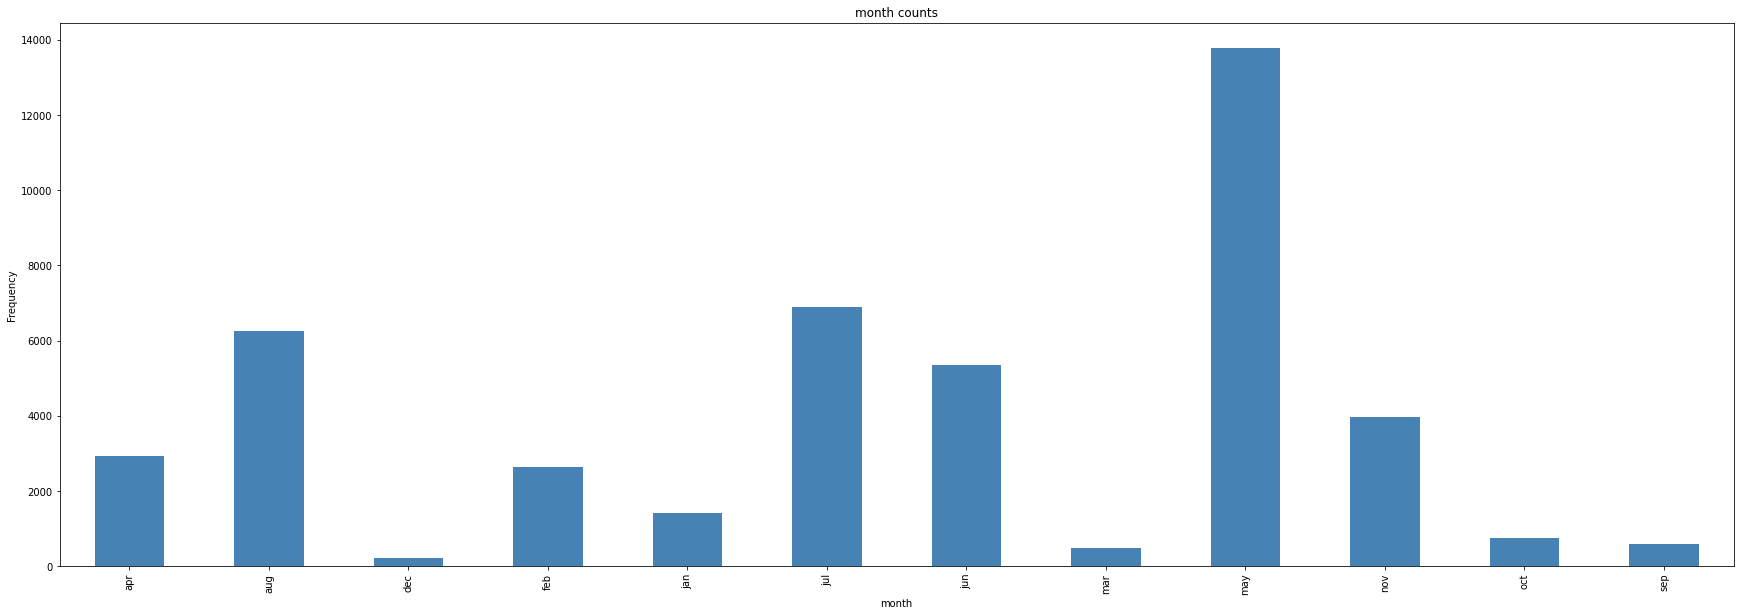

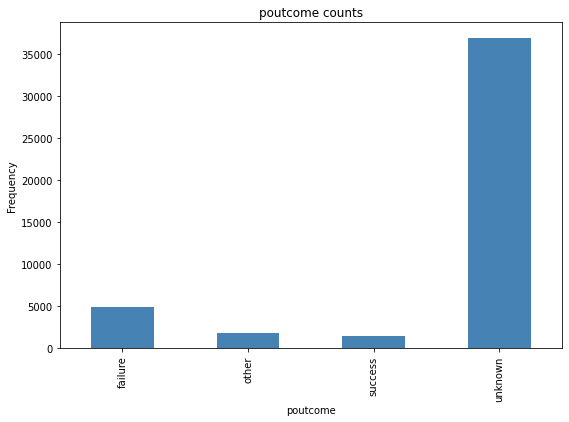

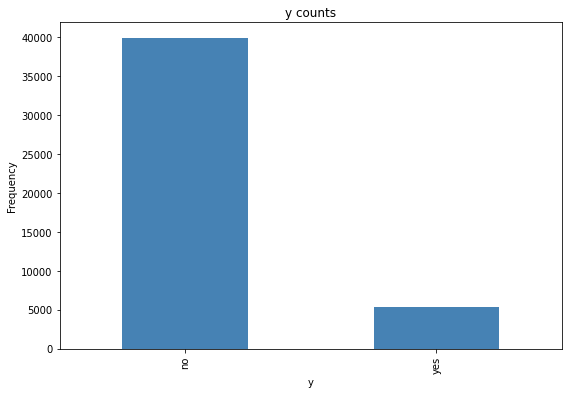

In [12]:
#Plots For Categorical Variables
for col in return_categorical(df):
    counts = df[col].value_counts().sort_index()
    if len(counts) > 10:
      fig = plt.figure(figsize=(30, 10))
    else:
      fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

In [17]:
#summary of the data for attributes with categorical values (with highest figure)
#Job - Management and blue collar 
#Marital - Marrieds
#Education - Secondary
#Default - No
#Housing  - yes
#Loan - No
#Contact - Cellular
#Month - May
#Poutcome - Unknown
#Y - No

SyntaxError: ignored

In [14]:
# Convert target variable into numeric
df.y = df.y.map({'no':0, 'yes':1}).astype('uint8')

In [15]:
# Build correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='PuBu')

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


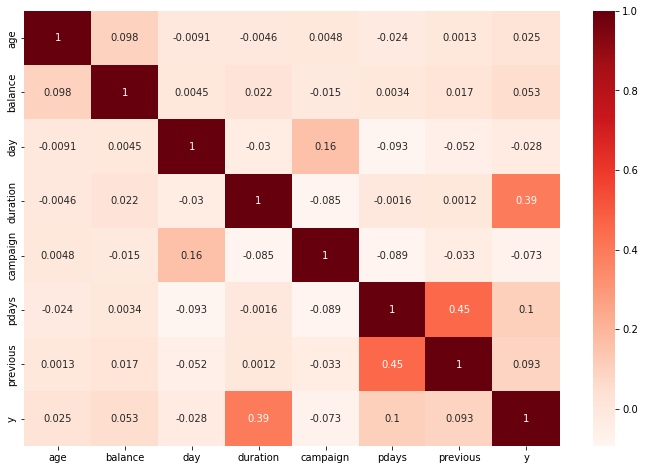

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="Reds", annot = True);

#most correlated with target feature is call duration. So we need to transform it to reduce the influence


In [19]:
#Checking Unique Values For pdays Column
df['pdays'].unique()

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

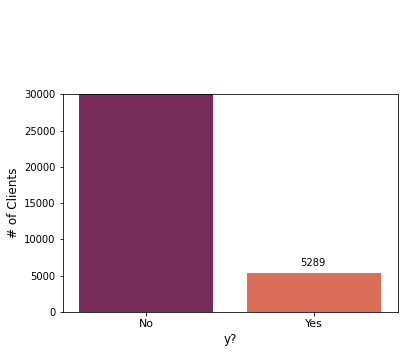

In [20]:
#Check distribution of target variable (y)
plt.figure(figsize=(6,4))

ax = sns.countplot(x="y", data=df, palette="rocket")

plt.xlabel("y?", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,30000)
plt.xticks([0,1], ['No', 'Yes'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+1000))
    
plt.show()

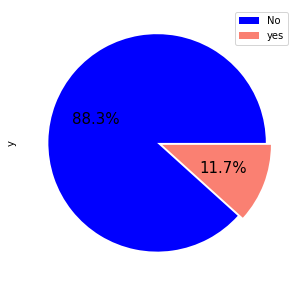

In [23]:
plt.figure(figsize=(7,5))

df['y'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['blue','salmon'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['No', 'yes'])
plt.show()

#Demographic Features


In [39]:
# Marital Status
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [27]:
# Marital Status
df['y'].groupby(df['marital']).value_counts(normalize = True)

marital   y
divorced  0    0.880545
          1    0.119455
married   0    0.898765
          1    0.101235
single    0    0.850508
          1    0.149492
Name: y, dtype: float64

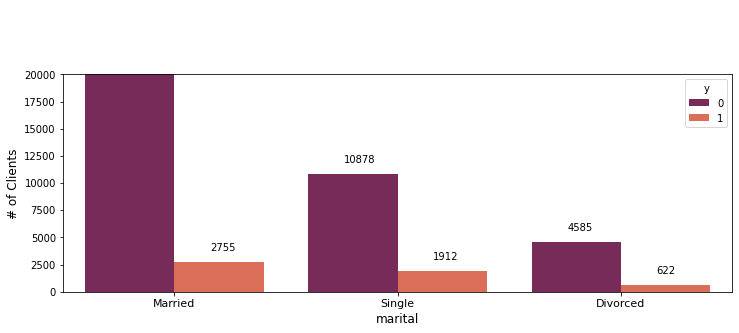

In [34]:
# Marital Status
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'marital', hue="y", palette = 'rocket')

plt.xlabel("marital", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1,2],[ 'Married', 'Single', 'Divorced'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

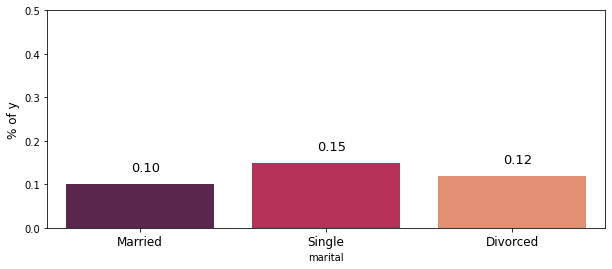

In [40]:
# Marital Status % of y
plt.figure(figsize=(10,4))

ax = sns.barplot(x = "marital", y = "y", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of y", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2],['Married', 'Single', 'Divorced'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=13)

plt.show()


In [41]:
#Education
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [42]:
df['y'].groupby(df['education']).value_counts(normalize = True)

education  y
primary    0    0.913735
           1    0.086265
secondary  0    0.894406
           1    0.105594
tertiary   0    0.849936
           1    0.150064
unknown    0    0.864297
           1    0.135703
Name: y, dtype: float64

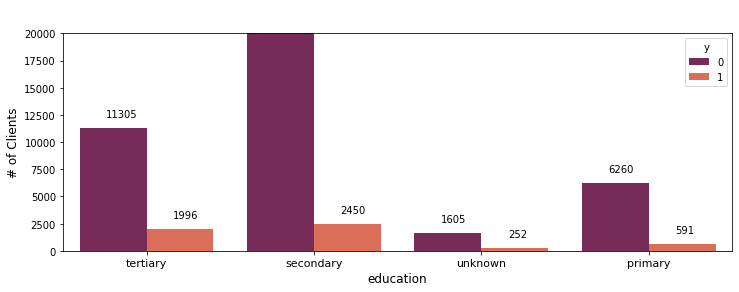

In [44]:
# Education Level
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'education', hue="y", palette = 'rocket')

plt.xlabel("education", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1,2, 3],[ 'tertiary', 'secondary', 'unknown' ,'primary'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

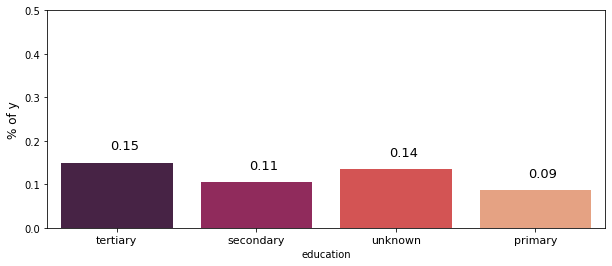

In [45]:
# Education Level % of y
plt.figure(figsize=(10,4))

ax = sns.barplot(x = "education", y = "y", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of y", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2, 3],[ 'tertiary', 'secondary', 'unknown' ,'primary'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=13)

plt.show()


#percentage of those who subscrbed to term deposit according to education level from highest to lowest is tertiary, unknown, secondary and primary

In [46]:
# Job
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [47]:
#Job
df['y'].groupby(df['job']).value_counts(normalize = True)

job            y
admin.         0    0.877973
               1    0.122027
blue-collar    0    0.927250
               1    0.072750
entrepreneur   0    0.917283
               1    0.082717
housemaid      0    0.912097
               1    0.087903
management     0    0.862444
               1    0.137556
retired        0    0.772085
               1    0.227915
self-employed  0    0.881571
               1    0.118429
services       0    0.911170
               1    0.088830
student        0    0.713220
               1    0.286780
technician     0    0.889430
               1    0.110570
unemployed     0    0.844973
               1    0.155027
unknown        0    0.881944
               1    0.118056
Name: y, dtype: float64

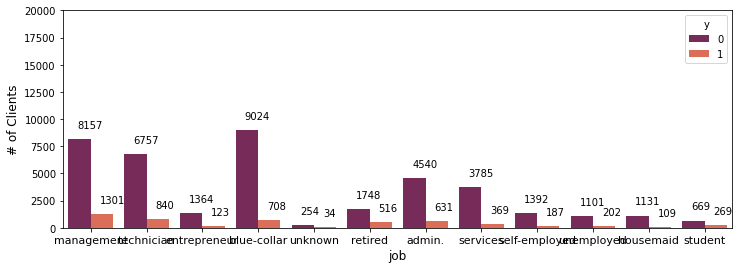

In [50]:
# Job 
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'job', hue="y", palette = 'rocket')

plt.xlabel("job", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1,2, 3,4,5,6,7,8,9,10,11],[ 'management' ,'technician' ,'entrepreneur', 'blue-collar', 'unknown',
 'retired', 'admin.', 'services', 'self-employed', 'unemployed' ,'housemaid',
 'student'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

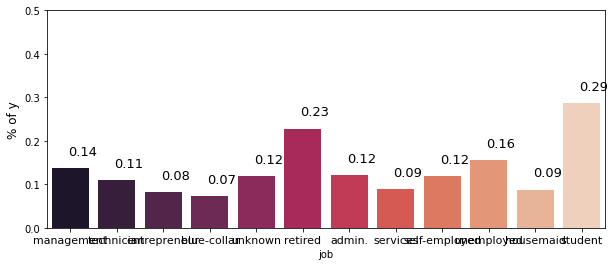

In [51]:
# Job % of y
plt.figure(figsize=(10,4))

ax = sns.barplot(x = "job", y = "y", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of y", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2, 3,4,5,6,7,8,9,10,11],[ 'management' ,'technician' ,'entrepreneur', 'blue-collar', 'unknown',
 'retired', 'admin.', 'services', 'self-employed', 'unemployed' ,'housemaid',
 'student'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=13)

plt.show()
